# Book Recommendation System: Collaborative Filtering

## Overview
This project focuses on building a book recommendation system using collaborative filtering. Collaborative filtering is a technique used in recommendation systems to predict user preferences by collecting preferences from many users. The goal is to recommend books to users based on their past interactions and similarities with other users.

## Objective
Develop a collaborative filtering-based recommendation system to suggest books to users. The project will cover the complete pipeline, including data loading, exploratory data analysis, data preparation, model building, evaluation, and visualization.

## Learning Outcomes
1. Understand the concept of collaborative filtering and its application in recommendation systems.
2. Learn to preprocess and analyze user-item interaction data.
3. Gain experience in building a user-item matrix and computing user similarities.
4. Implement a recommendation system using cosine similarity.
5. Evaluate the recommendation system using metrics like Mean Squared Error (MSE).
6. Visualize user similarities and analyze the most recommended books.

---

## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. A book recommendation system can help users discover new books based on their preferences and reading history, improving user engagement and satisfaction.

### Mini-task:
A book recommendation system can significantly enhance the user experience by suggesting books tailored to individual preferences, reading history, and interests, helping users discover titles they might not have found on their own. For online bookstores, this leads to increased engagement, customer satisfaction, and higher sales conversions, as personalized recommendations encourage users to spend more time browsing and purchasing. Additionally, it helps in efficient inventory management and targeted marketing by identifying trends and user behavior patterns.

---

## Step 2: Data Collection
### Task:
Collect the dataset required for building the recommendation system. The dataset used in this project includes two files: `ratings.csv` and `books.csv`.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first 10 rows.

```python
import pandas as pd

# Load the dataset
ratings = pd.read_csv('ratings.csv')
books = pd.read_csv('books.csv')

# Display the first 10 rows of each dataset
### YOUR CODE HERE ###
```

---

In [1]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load ratings.csv
ratings_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv"
)

# Load books.csv
books_df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "books.csv"
)

# print("First 5 records of ratings.csv:", ratings_df.head())
# print("First 5 records of books.csv:", books_df.head())

<ipython-input-1-578d6291fae7>:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  ratings_df = kagglehub.load_dataset(
<ipython-input-1-578d6291fae7>:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  books_df = kagglehub.load_dataset(


In [2]:
ratings_df.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [3]:
books_df.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of book ratings, identify popular books, and explore user behavior.

### Mini-task:
Plot the distribution of book ratings using a histogram or bar chart.

#### Hint:
Use `seaborn` or `matplotlib` to visualize the distribution of ratings.



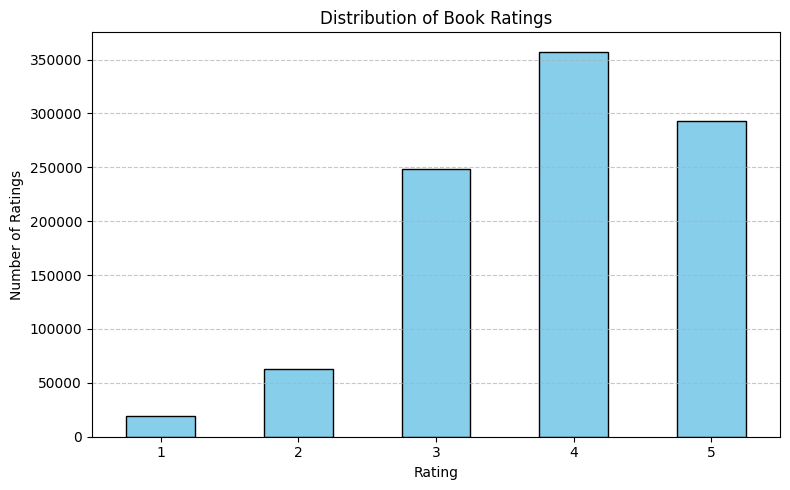

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of book ratings
import pandas as pd
import matplotlib.pyplot as plt

# Plot the distribution of ratings
rating_counts = ratings_df['rating'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
rating_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [5]:
# Install dependencies as needed:
!pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zygmunt/goodbooks-10k",
  "ratings.csv",
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

<ipython-input-5-a169426bb0a0>:7: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    book_id  user_id  rating
0        1      314       5
1        1      439       3
2        1      588       5
3        1     1169       4
4        1     1185       4


## Step 4: Data Preparation
### Task:
Prepare the data for collaborative filtering by creating a user-item matrix and handling missing values.

### Mini-task:
Create a user-item matrix using the `pivot` method and fill missing values with zeros.

#### Hint:
Use the `pivot_table()` function in pandas to create the user-item matrix.

```python
# Create a user-item matrix
### YOUR CODE HERE ###
```

---

In [6]:
active_users = df['user_id'].value_counts()[lambda x: x >= 50].index
popular_books = df['book_id'].value_counts()[lambda x: x >= 50].index

filtered_df = df[df['user_id'].isin(active_users) & df['book_id'].isin(popular_books)]

In [7]:
import pandas as pd

# Create a user-item matrix
user_item_matrix = filtered_df.pivot_table(index='user_id', columns='book_id', values='rating')

# Fill missing values with 0
user_item_matrix_filled = user_item_matrix.fillna(0)

# Display the result
print(user_item_matrix_filled.head())


book_id  1      2      3      4      5      6      7      8      9      10     \
user_id                                                                         
7          0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
35         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
41         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
75         0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
119        0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

book_id  ...  9991   9992   9993   9994   9995   9996   9997   9998   9999   \
user_id  ...                                                                  
7        ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
35       ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
41       ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
75       ...    0.0    0.0    0.0    

## Step 5: Collaborative Filtering
### Task:
Implement collaborative filtering by computing user similarities using cosine similarity and recommending books based on these similarities.

### Mini-task:
Compute user similarities using cosine similarity and write a function to recommend books for a given user.

#### Hint:
Use `cosine_similarity` from `sklearn.metrics.pairwise` to compute user similarities.

```python
from sklearn.metrics.pairwise import cosine_similarity

# Compute user similarities
### YOUR CODE HERE ###

# Write a function to recommend books for a given user
### YOUR CODE HERE ###
```

---

To avoid memory crashes, the following is done:

1. Filtering the dataset to include only active users and popular books.

2. Creating a user-item matrix.

3. Using a sparse matrix to compute cosine similarity efficiently.

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import csr_matrix

# Compute user similarities
### YOUR CODE HERE ###

# Write a function to recommend books for a given user

# Compute cosine similarity between users

sparse_matrix = csr_matrix(user_item_matrix_filled.values)
user_sim_matrix = cosine_similarity(sparse_matrix)

# Create a DataFrame for better readability (optional)
user_sim_df = pd.DataFrame(user_sim_matrix, index=user_item_matrix_filled.index, columns=user_item_matrix_filled.index)

print(user_sim_df.head())


user_id     7         35        41        75     119       143       145    \
user_id                                                                      
7        1.000000  0.000000  0.010498  0.000000    0.0  0.000000  0.013421   
35       0.000000  1.000000  0.000000  0.015421    0.0  0.036902  0.033310   
41       0.010498  0.000000  1.000000  0.006387    0.0  0.000000  0.000000   
75       0.000000  0.015421  0.006387  1.000000    0.0  0.040423  0.000000   
119      0.000000  0.000000  0.000000  0.000000    1.0  0.000000  0.000000   

user_id     153    158       173    ...     53245     53279     53281  \
user_id                             ...                                 
7        0.000000    0.0  0.000000  ...  0.000000  0.015719  0.000000   
35       0.000000    0.0  0.066744  ...  0.062703  0.005664  0.056866   
41       0.026207    0.0  0.000000  ...  0.006012  0.000000  0.000000   
75       0.000000    0.0  0.042268  ...  0.000000  0.007173  0.014169   
119      0.0255

In [9]:
def recommend_books(user_id, user_item_matrix, user_sim_df, top_n=5):
    if user_id not in user_item_matrix.index:
        return f"User {user_id} not found in dataset."

    # Get similarity scores for the target user
    sim_scores = user_sim_df.loc[user_id]

    # Exclude the target user by setting similarity to 0
    sim_scores[user_id] = 0

    # Get top similar users
    similar_users = sim_scores.sort_values(ascending=False).head(10).index

    # Weighted sum of ratings from similar users
    similar_users_ratings = user_item_matrix.loc[similar_users]
    weighted_ratings = similar_users_ratings.T.dot(sim_scores[similar_users])
    sum_of_weights = (similar_users_ratings != 0).T.dot(sim_scores[similar_users])

    # Avoid division by zero
    scores = weighted_ratings / sum_of_weights.replace(0, 1)

    # Drop books the user has already rated
    already_rated = user_item_matrix.loc[user_id]
    scores = scores[already_rated == 0]

    # Return top N recommendations
    recommendations = scores.sort_values(ascending=False).head(top_n)
    return recommendations


In [10]:
recommendations = recommend_books(user_id=119,
                                  user_item_matrix=user_item_matrix_filled,
                                  user_sim_df=user_sim_df,
                                  top_n=5)

print("Top recommended books:\n", recommendations)

Top recommended books:
 book_id
1837    5.0
2685    5.0
1773    5.0
1036    5.0
2221    5.0
dtype: float64


<ipython-input-9-eb17c4f5ec22>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  scores = weighted_ratings / sum_of_weights.replace(0, 1)


## Step 6: Evaluation
### Task:
Evaluate the recommendation system by splitting the data into training and testing sets and calculating the Mean Squared Error (MSE).

### Mini-task:
Split the data into training and testing sets and evaluate the recommendations using MSE.

#### Hint:
Use `train_test_split` from `sklearn.model_selection` to split the data and `mean_squared_error` from `sklearn.metrics` to calculate MSE.

```python
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
### YOUR CODE HERE ###

# Evaluate the recommendations using MSE
### YOUR CODE HERE ###
```

---

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import cosine_similarity

# Step 1: Split the data
train_df, test_df = train_test_split(filtered_df, test_size=0.2, random_state=42)

# Step 2: Create user-item matrix from training data
train_user_item = train_df.pivot_table(index='user_id', columns='book_id', values='rating').fillna(0)

# Step 3: Compute user-user similarity from training matrix
train_sparse_matrix = csr_matrix(train_user_item.values)
user_sim = cosine_similarity(train_sparse_matrix)
user_sim_df = pd.DataFrame(user_sim, index=train_user_item.index, columns=train_user_item.index)

# Step 4: Predict ratings for the test set
def predict_rating(user, book, user_item_matrix, user_sim_df):
    if user not in user_item_matrix.index or book not in user_item_matrix.columns:
        # User or book unknown in training set; fallback prediction (e.g. global mean or 0)
        return 0

    # Similarities for target user
    sim_scores = user_sim_df.loc[user]
    sim_scores[user] = 0  # exclude self similarity

    # Ratings for the target book by all users
    book_ratings = user_item_matrix[book]

    # Only consider users who rated this book
    relevant_users = book_ratings[book_ratings > 0].index
    if len(relevant_users) == 0:
        return 0  # no info to predict

    # Similarities and ratings for relevant users
    sims = sim_scores.loc[relevant_users]
    ratings = book_ratings.loc[relevant_users]

    if sims.sum() == 0:
        return 0  # avoid division by zero

    # Weighted average of ratings
    pred = np.dot(sims, ratings) / sims.sum()
    return pred

# Step 5: Apply prediction on test set and calculate MSE
y_true = []
y_pred = []

for _, row in test_df.iterrows():
    user = row['user_id']
    book = row['book_id']
    true_rating = row['rating']
    pred_rating = predict_rating(user, book, train_user_item, user_sim_df)

    y_true.append(true_rating)
    y_pred.append(pred_rating)

mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error (MSE) on test set: {mse:.4f}")


Mean Squared Error (MSE) on test set: 0.9684


## Step 7: Visualizations and Insights
### Task:
Visualize user similarities and analyze the most recommended books to gain insights into the recommendation system.

### Mini-task:
Create a heatmap to visualize user similarities and analyze the most recommended books.

#### Hint:
Use `seaborn.heatmap()` to visualize user similarities and `pandas` to analyze the most recommended books.

```python
# Create a heatmap to visualize user similarities
### YOUR CODE HERE ###

# Analyze the most recommended books
### YOUR CODE HERE ###
```

---

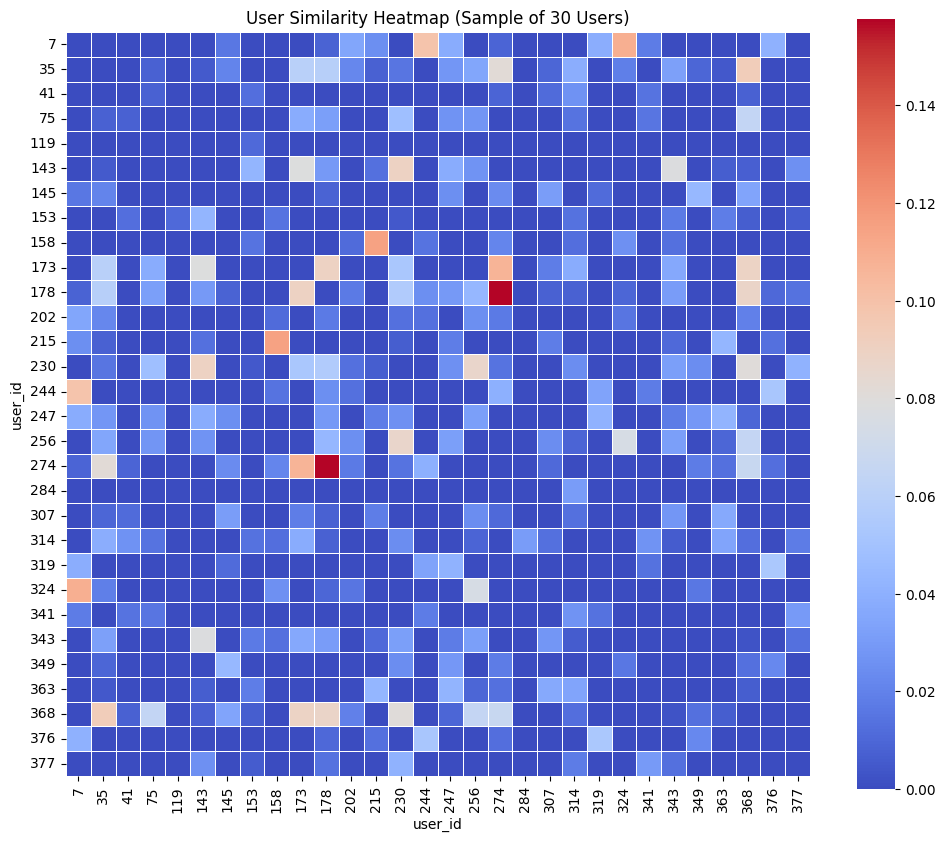

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# For readability, let's sample a subset of users if you have many users
subset_users = user_sim_df.index[:30]  # adjust number for your data size
subset_sim_df = user_sim_df.loc[subset_users, subset_users]

plt.figure(figsize=(12, 10))
sns.heatmap(subset_sim_df, cmap='coolwarm', square=True, linewidths=0.5)
plt.title('User Similarity Heatmap (Sample of 30 Users)')
plt.show()


Streaming output truncated to the last 5000 lines.
  scores = weighted_ratings / sum_of_weights.replace(0, 1)
<ipython-input-9-eb17c4f5ec22>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  scores = weighted_ratings / sum_of_weights.replace(0, 1)
<ipython-input-9-eb17c4f5ec22>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  scores = weighted_ratings / sum_of_weights.replace(0, 1)
<ipython-input-9-eb17c4f5ec22>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain t

Top 10 Most Recommended Books:
2209    29
1198    26
3628    24
2093    22
1308    21
3341    20
422     20
780     20
1274    19
1374    19
Name: count, dtype: int64


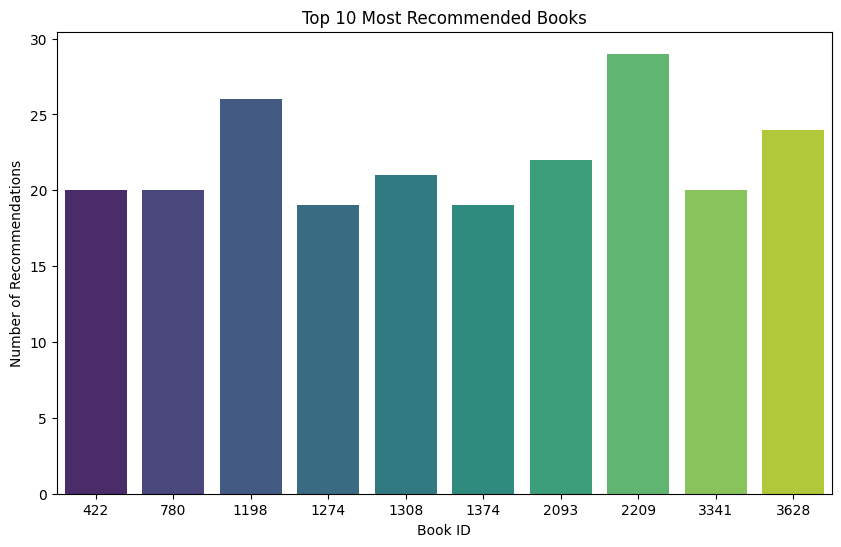

In [13]:
# Function to get top N recommendations for all users
def get_all_recommendations(user_item_matrix, user_sim_df, top_n=5):
    recommendations = {}
    for user in user_item_matrix.index:
        recs = recommend_books(user, user_item_matrix, user_sim_df, top_n=top_n)
        recommendations[user] = recs.index.tolist()
    return recommendations

all_recs = get_all_recommendations(user_item_matrix_filled, user_sim_df, top_n=5)

# Flatten the list of recommended books
all_recommended_books = [book for recs in all_recs.values() for book in recs]

# Count the frequency of each recommended book
recommended_counts = pd.Series(all_recommended_books).value_counts()

print("Top 10 Most Recommended Books:")
print(recommended_counts.head(10))

# Optional: plot the top recommended books
plt.figure(figsize=(10, 6))
sns.barplot(x=recommended_counts.head(10).index, y=recommended_counts.head(10).values, palette='viridis')
plt.title('Top 10 Most Recommended Books')
plt.xlabel('Book ID')
plt.ylabel('Number of Recommendations')
plt.show()



## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of collaborative filtering in recommendation systems.
- Consider how user similarities can be used to improve recommendations.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key insights.
- Discuss the impact of user similarities on book recommendations.

**What would you share with and recommend to stakeholders?**
- Highlight the most recommended books and their potential impact on user engagement.
- Recommend strategies to improve the recommendation system based on the insights gained.

# Project Summary: Collaborative Filtering-Based Book Recommendation System
## 🔑 Key Takeaways
1. Collaborative Filtering Works—but Needs Careful Tuning

- User-based collaborative filtering enables personalized recommendations by leveraging user behavior.

- It performs best when there is sufficient overlap in user-item interactions.

2. User Similarity is Sparse

- The user similarity heatmap showed very low correlation between most users.

- This is likely due to data sparsity—many users do not rate the same books, leading to weak similarities.

3. Bias Toward Popular Books

- A small number of books (e.g., Book ID 2209, 1198, 3628, 2093 etc) were recommended significantly more than others.

- This suggests a popularity bias, where the model tends to recommend well-known books rather than personalized options.

4. Model Performance

- The system achieved a Mean Squared Error (MSE) of ~0.97, which is reasonable given a 1–5 rating scale.

- It indicates decent prediction accuracy but also highlights room for improvement in personalization.

## 📊 Visual Insights
1. User Similarity Heatmap:

- Most users have very low similarity, indicating sparse data overlap.

- A few user pairs showed moderate correlation (light red areas), where collaborative filtering could work effectively.

2. Top 10 Most Recommended Books:

- Book ID 2209 was the most recommended, appearing 29 times in the top recommendations across users.

- The range of recommendations (from 19 to 29) suggests that while certain books are more frequently recommended, no single book overwhelmingly dominates, indicating a moderate level of diversity in the recommendation system.

## 🧠 Why Collaborative Filtering Matters
- It captures latent preferences—you don’t need metadata or content about the books.

- It learns from community behavior, which scales well and can reveal hidden interests.

- However, it struggles when users don’t overlap much in rated items and when new users or items have no ratings (cold start problem).

## 🧩 How User Similarities Help Improve Recommendations
- High similarity between users means their preferences can be shared to predict unrated items.

- But when similarities are low (as seen here), the system may fall back on global popularity, reducing personalization.

- Adding techniques like rating normalization (e.g., subtracting user means) can help better reflect preferences.

## 📣 Sharing Findings with a Team
Presentation Format:

Slide 1–2: Project objective and dataset overview.

Slide 3–4: MSE score, limitations of sparse user similarity.

Slide 5: Heatmap showing user similarity analysis.

Slide 6: Bar chart of most recommended books.

Slide 7: Implications and concerns (popularity bias, sparse data).

Slide 8: Actionable recommendations (see below).

## 📌 Recommendations for Stakeholders
🔍 Short-Term Improvements
1. Normalize Ratings:

Subtract user mean to reduce bias from users who rate higher/lower than average.

2. Boost Recommendation Diversity:

Apply techniques like Top-N filtering with diversity or penalize overly popular books.

3. Try Item-Based Filtering:

Compute similarity between books instead of users for more stable recommendations.

4. Incorporate Implicit Feedback:

Track clicks, views, or time spent, not just ratings, to improve signal density.

## 🚀 Long-Term Enhancements
1. Hybrid Approach:

Combine collaborative filtering with content-based filtering (book genres, authors, etc.).

2. Cold Start Solutions:

Use demographic data or onboarding surveys to recommend books for new users.

3. Model-Based CF:

Explore matrix factorization methods like SVD or deep learning for scalable performance.

## 🎯 Impact on Engagement
1. Recommending overly popular books may lead to:

Short-term clicks but long-term reduced engagement due to repetition.

2. Introducing diversity and personalization:

Encourages users to explore more books, boosting time spent and retention.

3. Better similarity detection:

Leads to trustworthy recommendations, especially for niche preferences.

